In [15]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 12 18:47:16 2022

@author: Group 7
"""
 
""" 
Snippet from the previous task: START 
"""
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from scipy.integrate import odeint
  


In [16]:

def ReactionRates(X,c3,c4,c5):  
        R = np.zeros((6,1))
        R[0] = k[0]
        R[1] = k[1]*X[0]
        R[2] = c2*X[0]*X[2]
        R[3] = c3*X[1]
        R[4] = c4*X[1]
        R[5] = c5*X[2]
        return R[:,0]   
 
def ModelPrediction(t_data,c3,c4,c5): 
    y = odeint(RHS, X.flatten('K'), t_data,  
               args = (c3,c4,c5), tfirst = True) 
    return y[:,2]
  
def RHS(t, X, c3, c4, c5):  
    R = ReactionRates(X, c3, c4, c5)
    dx = np.dot(np.transpose(s), R)
    return dx.flatten('K')


In [17]:

global s, k, X 
s = np.array([[1,0,0],[-1,0,0],[-1,1,-1], 
              [0,-1,0],[0,0,1],[0,0,-1]])
k = [100, 0.1]
c2 = 0.01  
#k3 = 1.0, k4 = 10, k5 = 2
X = np.array([k[0]/k[1], 0, 20])
t_data, y_data = np.load('Data.npy')   
  
""" 
Snippet from the previous task: END
"""  
c3_par = [] 
c4_par = [] 
c5_par = [] 
 

In [18]:

#################################
# parameter estimation 30 times #  
# with random start parameters  #
################################# 

for i in range(30):
    popt, pcov = curve_fit(ModelPrediction, t_data, 
                       y_data, bounds=(0,np.inf),
                       p0 = np.random.rand(3))    
     
###########################################
# Collect the inferred optimal parameters #  
###########################################  
    c3_par.append(popt[0]) 
    c4_par.append(popt[1])  
    c5_par.append(popt[2])  
  

In [23]:
# python 3.x
import numpy as np
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
normalized_c3 =scaler.fit_transform(np.array(c3_par).reshape(-1,1)).reshape(1,30)
normalized_c4 =scaler.fit_transform(np.array(c4_par).reshape(-1,1)).reshape(1,30)
normalized_c5 =scaler.fit_transform(np.array(c5_par).reshape(-1,1)).reshape(1,30)

[0.7168227208054787, 0.7168279346559657, 0.7168293232844924, 0.7168215300308192, 3.010090794427399, 3.0100906302799704, 0.7168268412235593, 0.7168218482049512, 3.0100594893402888, 0.716824170242217, 0.7168292304860416, 0.7168240665048068, 0.7168286579666456, 0.7168240515553597, 0.7168267451259939, 0.7168234773206973, 0.7168268991162091, 0.7168236325035782, 0.7168221583954755, 0.7168288989037374, 0.7168234176544602, 0.7168243329041719, 0.7168269192034802, 3.01008455575028, 0.7168237545708306, 0.7168241232838627, 3.0100587831548373, 0.7168232953300623, 3.010045103398666, 3.0100928130570606]


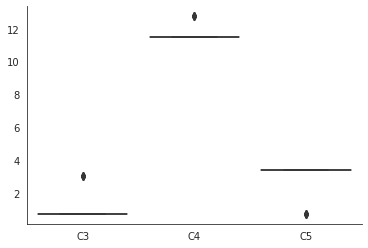

In [22]:
opt = {'C3':c3_par,'C4':c4_par,'C5':c5_par}
data = pd.DataFrame(opt) 
    
sns.set_style('white')
sns.boxplot(data=data, palette='flare')
sns.despine()
plt.show()

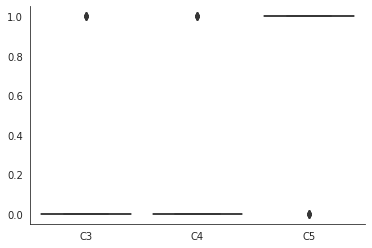

In [20]:
opt = {'C3':normalized_c3[0],'C4':normalized_c4[0],'C5':normalized_c5[0]}
data = pd.DataFrame(opt) 
    
sns.set_style('white')
sns.boxplot(data=data, palette='flare')
sns.despine()
plt.show()

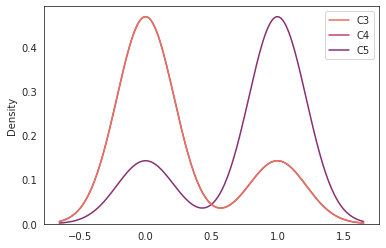

In [21]:
import seaborn as sns
sns.set_style('white')
sns.kdeplot(data=data, palette='flare')